In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df=pd.read_csv("Incomes.csv")
df=df.drop(columns='Unnamed: 0')

In [59]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


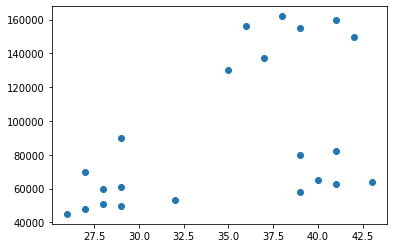

In [60]:
plt.scatter(df['Age'],df['Income($)'])

In [61]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
y_predicted=km.fit_predict(df[['Age','Income($)']])  #fits and predicts the no of clusters we want
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [63]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


No handles with labels found to put in legend.


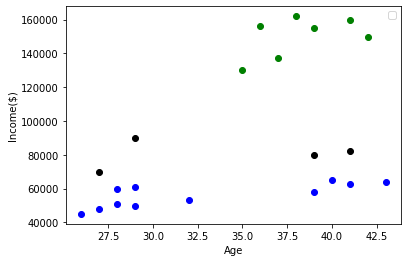

In [64]:
df1=df[df.cluster==0]  #list of elements in 1st cluster
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green') 
plt.scatter(df2.Age,df2['Income($)'],color='blue') 
plt.scatter(df3.Age,df3['Income($)'],color='black')  
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [65]:
#we can see the above graph isnt quite right as 2 clusters are kinda wrong, this is happening because of the disparity in scaling of x and y axis
#to avoid this, we use minmax scalar

In [66]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['income($)']=scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster,income($)
0,Rob,27,70000,2,0.213675
1,Michael,29,90000,2,0.384615
2,Mohan,29,61000,1,0.136752
3,Ismail,28,60000,1,0.128205
4,Kory,42,150000,0,0.897436


In [67]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster,income($)
0,Rob,0.058824,70000,2,0.213675
1,Michael,0.176471,90000,2,0.384615
2,Mohan,0.176471,61000,1,0.136752
3,Ismail,0.117647,60000,1,0.128205
4,Kory,0.941176,150000,0,0.897436


In [68]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [69]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster,income($)
0,Rob,0.058824,70000,0,0.213675
1,Michael,0.176471,90000,0,0.384615
2,Mohan,0.176471,61000,2,0.136752
3,Ismail,0.117647,60000,2,0.128205
4,Kory,0.941176,150000,1,0.897436
5,Gautam,0.764706,155000,1,0.940171
6,David,0.882353,160000,1,0.982906
7,Andrea,0.705882,162000,1,1.000000
8,Brad,0.588235,156000,1,0.948718
9,Angelina,0.529412,130000,1,0.726496


In [70]:
km.cluster_centers_

array([[4.70588235e-01, 8.05000000e+04],
       [7.22689076e-01, 1.50000000e+05],
       [4.06417112e-01, 5.61363636e+04]])

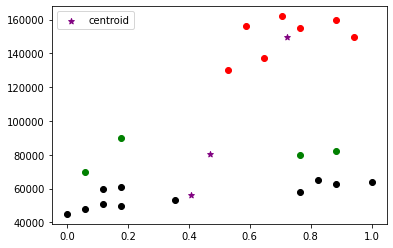

In [71]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
#https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb for better and complete visulization

In [72]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

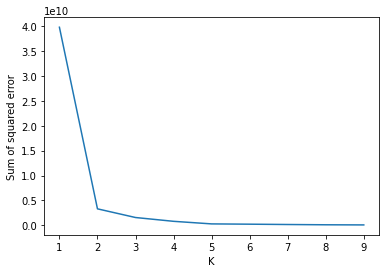

In [73]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)